In [2]:
#langchain architectures is installed
!pip install langgraph langsmith langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 22.0 MB/s eta 0:00:00


In [4]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image,display


In [ ]:
groq_api_key = 'Keyid'

In [6]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name='gemma2-9b-it')

In [16]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
  sentiment: str

def preprocess(state:State) -> State:
  cleaned = state['messages'][-1].content.strip()
  state['messages'][-1].content = cleaned
  return state

def analyze_sentiment(state:State) -> State:
  msg = state['messages'][-1].content
  state['sentiment'] = 'positive' if 'good' in msg else 'neutral'
  return state

def chatbot(state: State) -> State:
  return{'messages':llm.invoke(state['messages'])}

def logger(state:State) -> State:
  print(f'LOG: {state["messages"][-1].content},Sentiment:{state.get["sentiment"]}')
  return state

In [17]:
builder = StateGraph(State)
builder.add_node('preprocess',preprocess)
builder.add_node('analyze_sentiment',analyze_sentiment)
builder.add_node('chatbot',chatbot)
builder.add_node('logger',logger)

In [18]:
builder.add_edge(START,'preprocess')
builder.add_edge('preprocess','analyze_sentiment')
builder.add_edge('analyze_sentiment','chatbot')
builder.add_edge('chatbot','logger')
builder.add_edge('logger',END)


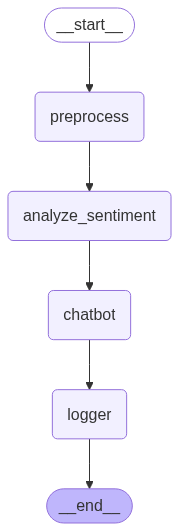

In [19]:
builder.compile()

In [25]:
graph = builder.compile()

In [27]:
input_message = 'This is a training program'
final_state = graph.stream({'messages':('user',input_message)})

print('final_state',final_state)
print('chatbot response',final_state['messages'][-1].content)
print('Detected Sentiment',final_state['sentiment'])

input_message_2 = 'This is a bad training program'
final_state2 = graph.invoke({'messages':[{'role':'user','content':input_message_2}]})

print('final_state 2',final_state2)
print('chatbot response 2',final_state2['messages'][-1].content)
print('Detected Sentiment',final_state2['sentiment'])


final_state <generator object Pregel.stream at 0x7ad72b637c40>


TypeError: 'generator' object is not subscriptable